<a href="https://colab.research.google.com/github/2303A52291/aiml2303a52291/blob/main/aiml_lab_exam_22_nov_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

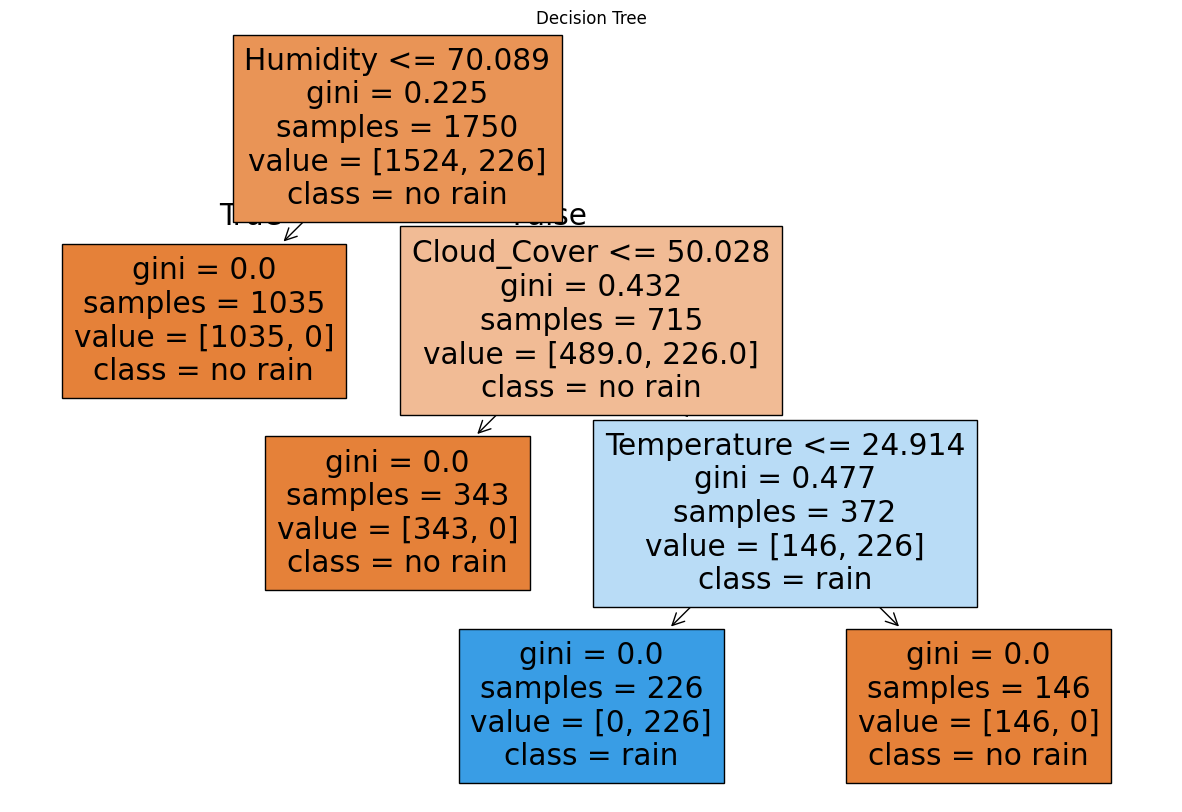

Accuracy (without pruning): 1.0


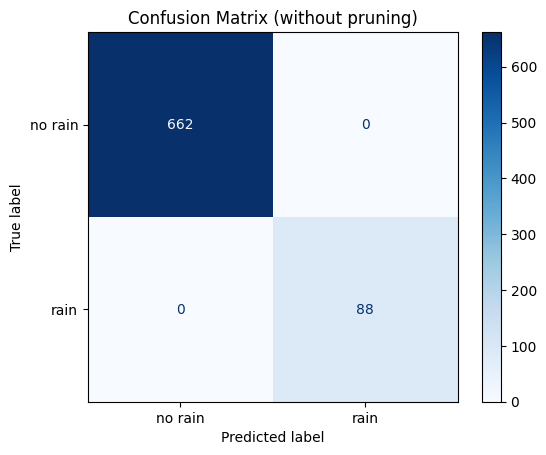

Accuracy (with pruning): 1.0


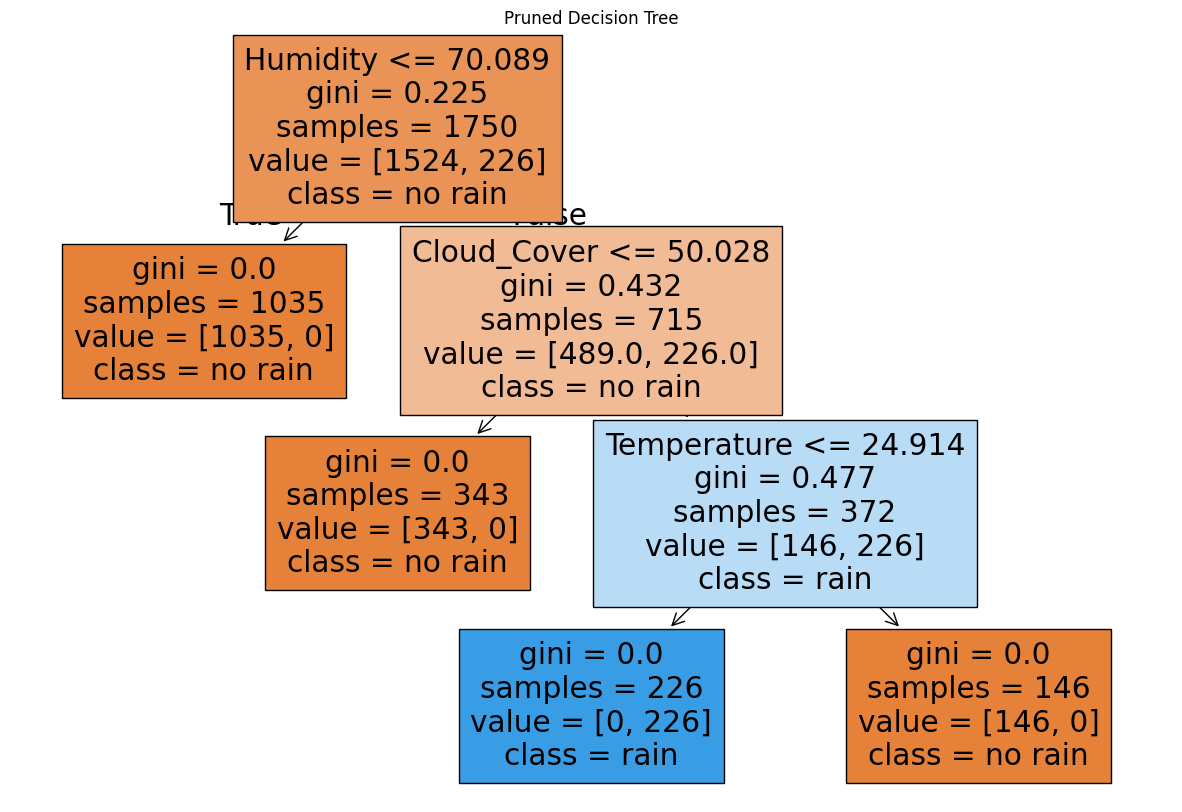


Feature Importance (Unpruned Tree):
Feature: Temperature, Importance: 0.4507
Feature: Humidity, Importance: 0.2147
Feature: Wind_Speed, Importance: 0.0000
Feature: Cloud_Cover, Importance: 0.3347
Feature: Pressure, Importance: 0.0000

Feature Importance (Pruned Tree):
Feature: Temperature, Importance: 0.4507
Feature: Humidity, Importance: 0.2147
Feature: Wind_Speed, Importance: 0.0000
Feature: Cloud_Cover, Importance: 0.3347
Feature: Pressure, Importance: 0.0000

Most Important Feature (Unpruned Tree): Temperature
Most Important Feature (Pruned Tree): Temperature

Performance Comparison:
Accuracy without pruning: 1.0000
Accuracy with pruning: 1.0000


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset from CSV file
# Make sure your CSV has the features in columns and the target in the last column
data = pd.read_csv('/content/weather_forecast_data.csv')

# Separate features and target
X = data.iloc[:, :-1].values  # All columns except the last one
y = data.iloc[:, -1].values   # The last column as the target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Build a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=data.columns[:-1], class_name
plt.title("Decision Tree")
plt.show()

# 2. Evaluate the model's performance
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (without pruning):", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix (without pruning)")
plt.show()

# 3. Implement pruning (set max_depth or min_samples_split)
pruned_clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Example with max_depth=3
pruned_clf.fit(X_train, y_train)

# Evaluate the pruned model
y_pruned_pred = pruned_clf.predict(X_test)
pruned_accuracy = accuracy_score(y_test, y_pruned_pred)
print("Accuracy (with pruning):", pruned_accuracy)

# Visualize the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(pruned_clf, filled=True, feature_names=data.columns[:-1], class_names=str(set(y)))
plt.title("Pruned Decision Tree")
plt.show()

# 4. Identify the most important feature(s)
# Unpruned tree feature importance
importance = clf.feature_importances_
print("\nFeature Importance (Unpruned Tree):")
for i, v in enumerate(importance):
    print(f"Feature: {data.columns[i]}, Importance: {v:.4f}")

# Pruned tree feature importance
pruned_importance = pruned_clf.feature_importances_
print("\nFeature Importance (Pruned Tree):")
for i, v in enumerate(pruned_importance):
    print(f"Feature: {data.columns[i]}, Importance: {v:.4f}")

# Highlight the most important features
most_important_unpruned = data.columns[np.argmax(importance)]
most_important_pruned = data.columns[np.argmax(pruned_importance)]
print(f"\nMost Important Feature (Unpruned Tree): {most_important_unpruned}")
print(f"Most Important Feature (Pruned Tree): {most_important_pruned}")

# 5. Compare the performance of the two models
print("\nPerformance Comparison:")
print(f"Accuracy without pruning: {accuracy:.4f}")
print(f"Accuracy with pruning: {pruned_accuracy:.4f}")
